# Project Report IV: Finally, Some Data Analysis!
___
**Brief:**<br>
In this report, I'll be taking on the unsupervised and then supervised learning tasks for my project.

**Sections:**<br>
1. [Failed Unsupervised Learning: A Prologue](#1)
2. [Data Exploration](#2)
    - [DateTime and Chronology](#2a)
    - [A Census of the Users](#2b)
    - [Word Data at the User Level](#2c)
___
<a id='1'>

## Failed Unsupervised Learning: A Prologue
<a id='1a'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import nltk
from nltk.corpus import PlaintextCorpusReader as cr
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import pickle
file = open('email_df', 'rb')
email_df = pickle.load(file)
file.close()

In [3]:
small_df = email_df.sample(20000)
small_df[:5]

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User
225427,"Mon, 8 Jan 2001 09:48:00 -0800 (PST)",susan.mara@enron.com,"alan.comnes@enron.com, angela.schwarz@enron.co...",Update Day 3 -- Session 2 -- FERC CA Settlement,1.0,"Alan Comnes, Angela Schwarz, Beverly Aden, Bil...",,,\Steven_Kean_Oct2001_2\Notes Folders\Attachments,KEAN-S,skean.nsf,None,Next Steps\n\nResumes 1/10/01 in WDC. Enron w...,attachments,kean-s
229713,"Wed, 24 Jan 2001 00:06:00 -0800 (PST)",steven.kean@enron.com,lisa.connolly@enron.com,Re: News Conference Layout,1.0,Lisa Connolly,,,\Steven_Kean_June2001_4\Notes Folders\Discussi...,KEAN-S,skean.nsf,None,the format looks good to me. I'd suggest that...,discussion_threads,kean-s
170305,"Tue, 27 Nov 2001 07:38:19 -0800 (PST)",v.dickerson@enron.com,"eric.gadd@enron.com, kevin.hyatt@enron.com",Meeting w/ Rob Kilmer,1.0,"Gadd, Eric </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Eg...",,,"\KHYATT (Non-Privileged)\Hyatt, Kevin\Deleted ...",Hyatt-K,KHYATT (Non-Privileged).pst,None,"\nEric and Kevin,\n\nA meeting has been set wi...",deleted_items,hyatt-k
204494,"Fri, 22 Dec 2000 08:33:00 -0800 (PST)",vince.kaminski@enron.com,vince.kaminski@enron.com,f/up,1.0,Vince J Kaminski,,,\Vincent_Kaminski_Jun2001_2\Notes Folders\Disc...,Kaminski-V,vkamins.nsf,None,---------------------- Forwarded by Vince J Ka...,discussion_threads,kaminski-v
183330,"Fri, 5 Oct 2001 14:39:23 -0700 (PDT)",wendi.lebrocq@enron.com,"c..koehler@enron.com, tana.jones@enron.com",FW: Confidentiality Agreement,1.0,"Koehler, Anne C. </O=ENRON/OU=NA/CN=RECIPIENTS...",,,"\TJONES (Non-Privileged)\Jones, Tana\Inbox",Jones-T,TJONES (Non-Privileged).pst,None,"\n\nRegards,\n\nWendi LeBrocq\n3-3835\n\n-----...",inbox,jones-t


*Note*: So at this point, there is just too much data. Going to use "small_df" the rest of the way.<br>
*Python Note*: We need .sample() here! I did this whole thing without it and it was just two users...

In [4]:
#vectorizer = TfidfVectorizer(stop_words="english")
#text_tfidf = vectorizer.fit_transform(text)
#text_tfidf

In [5]:
#from sklearn.cluster import KMeans
#k_model = KMeans(n_clusters=3)
#k_model.fit(text_tfidf)
#k_model.predict(text_tfidf)
#labels = k_model.labels_

In [6]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#plot = plt.figure()
#ax = Axes3D(plot, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax.scatter(text[:, 3], text[:, 0], text[:, 2],
#          c=labels.astype(np.float), edgecolor="k", s=50)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("z")
#plt.title("K Means", fontsize=14)

*Summary*: So, ultimately this has been a very confusing experience for me. I tried to take on unsupervised learning, but I'm really finding myself learning much more on tutorials than I'd like to. Instead, let's take a step back and look other parts of the data, then revisit this.
<a id='2'>

## Data Exploration
<a id='2a'>

***DateTime and Chronology***<br>
Much of what follows is inspired by a fantastic resource I found on Kaggle (https://www.kaggle.com/dfoly1/k-means-clustering-from-scratch). I'll be using it to help organize my DF better (the _to_datetime_ thing and much of the unsupervised learning).

My first goal is to get a sense of when these emails were sent, so we'll be using the DateTime library!

In [7]:
small_df['Date'] = pd.to_datetime(small_df['Date'], infer_datetime_format=True)

In [8]:
months = []
days = []
years = []
for date in small_df['Date']:
    months.append(date.month)
    days.append(date.day)
    years.append(date.year)
small_df["Month"] = months
small_df["Day"] = days
small_df["Year"] = years
small_df[:5]

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
225427,2001-01-08 09:48:00-08:00,susan.mara@enron.com,"alan.comnes@enron.com, angela.schwarz@enron.co...",Update Day 3 -- Session 2 -- FERC CA Settlement,1.0,"Alan Comnes, Angela Schwarz, Beverly Aden, Bil...",,,\Steven_Kean_Oct2001_2\Notes Folders\Attachments,KEAN-S,skean.nsf,None,Next Steps\n\nResumes 1/10/01 in WDC. Enron w...,attachments,kean-s,1,8,2001
229713,2001-01-24 00:06:00-08:00,steven.kean@enron.com,lisa.connolly@enron.com,Re: News Conference Layout,1.0,Lisa Connolly,,,\Steven_Kean_June2001_4\Notes Folders\Discussi...,KEAN-S,skean.nsf,None,the format looks good to me. I'd suggest that...,discussion_threads,kean-s,1,24,2001
170305,2001-11-27 07:38:19-08:00,v.dickerson@enron.com,"eric.gadd@enron.com, kevin.hyatt@enron.com",Meeting w/ Rob Kilmer,1.0,"Gadd, Eric </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Eg...",,,"\KHYATT (Non-Privileged)\Hyatt, Kevin\Deleted ...",Hyatt-K,KHYATT (Non-Privileged).pst,None,"\nEric and Kevin,\n\nA meeting has been set wi...",deleted_items,hyatt-k,11,27,2001
204494,2000-12-22 08:33:00-08:00,vince.kaminski@enron.com,vince.kaminski@enron.com,f/up,1.0,Vince J Kaminski,,,\Vincent_Kaminski_Jun2001_2\Notes Folders\Disc...,Kaminski-V,vkamins.nsf,None,---------------------- Forwarded by Vince J Ka...,discussion_threads,kaminski-v,12,22,2000
183330,2001-10-05 14:39:23-07:00,wendi.lebrocq@enron.com,"c..koehler@enron.com, tana.jones@enron.com",FW: Confidentiality Agreement,1.0,"Koehler, Anne C. </O=ENRON/OU=NA/CN=RECIPIENTS...",,,"\TJONES (Non-Privileged)\Jones, Tana\Inbox",Jones-T,TJONES (Non-Privileged).pst,None,"\n\nRegards,\n\nWendi LeBrocq\n3-3835\n\n-----...",inbox,jones-t,10,5,2001


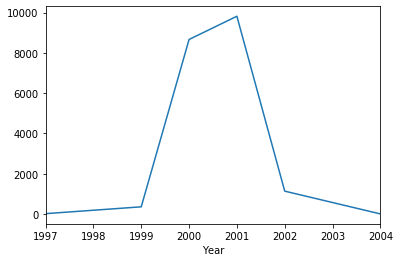

<Figure size 432x288 with 0 Axes>

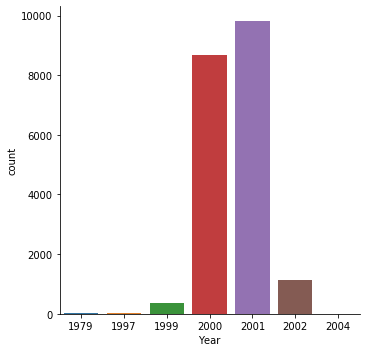

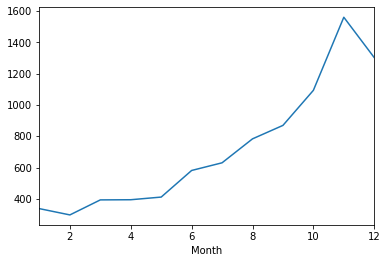

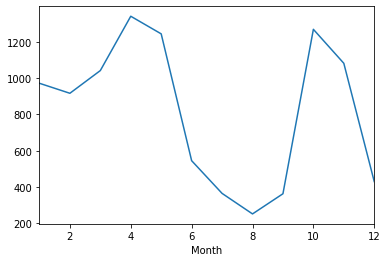

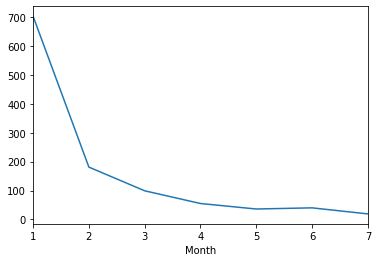

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
x_ax = (small_df["Year"] >= 1995) & (small_df["Year"] <= 2005)
fig = plt.figure()
graphYears = small_df.loc[x_ax].groupby("Year")["Text"].count().plot()
fig.savefig('graphYears.png')

fig = plt.figure()
barYears = sns.catplot(x='Year',data=small_df,kind='count')
fig.savefig('barYears.png')

x_ax = (small_df["Year"] == 2000)
fig = plt.figure()
graph2000 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()
fig.savefig('graph2000.png')

x_ax = (small_df["Year"] == 2001)
fig = plt.figure()
graph2001 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()
fig.savefig('graph2001.png')

x_ax = (small_df["Year"] == 2002)
fig = plt.figure()
graph2002 = small_df.loc[x_ax].groupby("Month")["Text"].count().plot()
fig.savefig('graph2002.png')

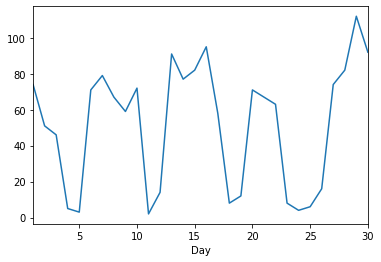

In [11]:
x_ax = (small_df["Year"] == 2000) & (small_df["Month"] == 11)
fig = plt.figure()
graph_911 = small_df.loc[x_ax].groupby("Day")["Text"].count().plot()
fig.savefig('graph911.png')

*Note*: Because this is only a sample of 20,000, the data gets small on a month-to-month basis. However, this corpus could also give us insights on how people reacted to major world events. I'd assume absolutely nobody was emailing on 9/11, but it would be interesting to see what the existing emails say.

**Summary**: As we can see here, our 20,000 emails are only distributed over four years, peaking over 2000 and 2001. This checks out with what we know about the Enron Scandal. I'd be interested to see if the years get wider over a larger sample?
<a id='2b'>

***A Census of The Users***

In [12]:
setTo = small_df["To"].nunique()
setFrom = small_df["From"].nunique()
totalSet = len(small_df)
print("percentage of emails to unique people:", (setTo/totalSet)*100)
print("percentage of emails from unique people:", (setFrom/totalSet)*100)

percentage of emails to unique people: 42.6
percentage of emails from unique people: 19.655


*Note*: Very round, whole numbers. Satisfying.

In [13]:
toUsers = (((small_df.groupby("User")["To"].nunique())/small_df.groupby("User")["To"].count())*100)
fromUsers = ((small_df.groupby("User")["From"].nunique())/small_df.groupby("User")["From"].count())*100

In [14]:
toUsers.keys()
toUsers

Index(['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e',
       'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r',
       'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s',
       'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c',
       'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t',
       'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j', 'fossum-d',
       'gang-l', 'gay-r', 'geaccone-t', 'germany-c', 'gilbertsmith-d',
       'giron-d', 'griffith-j', 'grigsby-m', 'guzman-m', 'haedicke-m',
       'hain-m', 'harris-s', 'hayslett-r', 'heard-m', 'hendrickson-s',
       'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'hyvl-d',
       'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j',
       'kitchen-l', 'kuykendall-t', 'lavorato-j', 'lay-k', 'lenhart-m',
       'lewis-a', 'linder-e', 'lokay-m', 'lokey-t', 'love-p', 'lucci-p'],
      dtype='object', name='User')

User
allen-p     48.514851
arnold-j    40.793201
arora-h     46.666667
badeer-r    60.000000
bailey-s    60.000000
              ...    
linder-e     8.938547
lokay-m     56.500000
lokey-t     70.754717
love-p      56.470588
lucci-p     58.108108
Name: To, Length: 71, dtype: float64

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

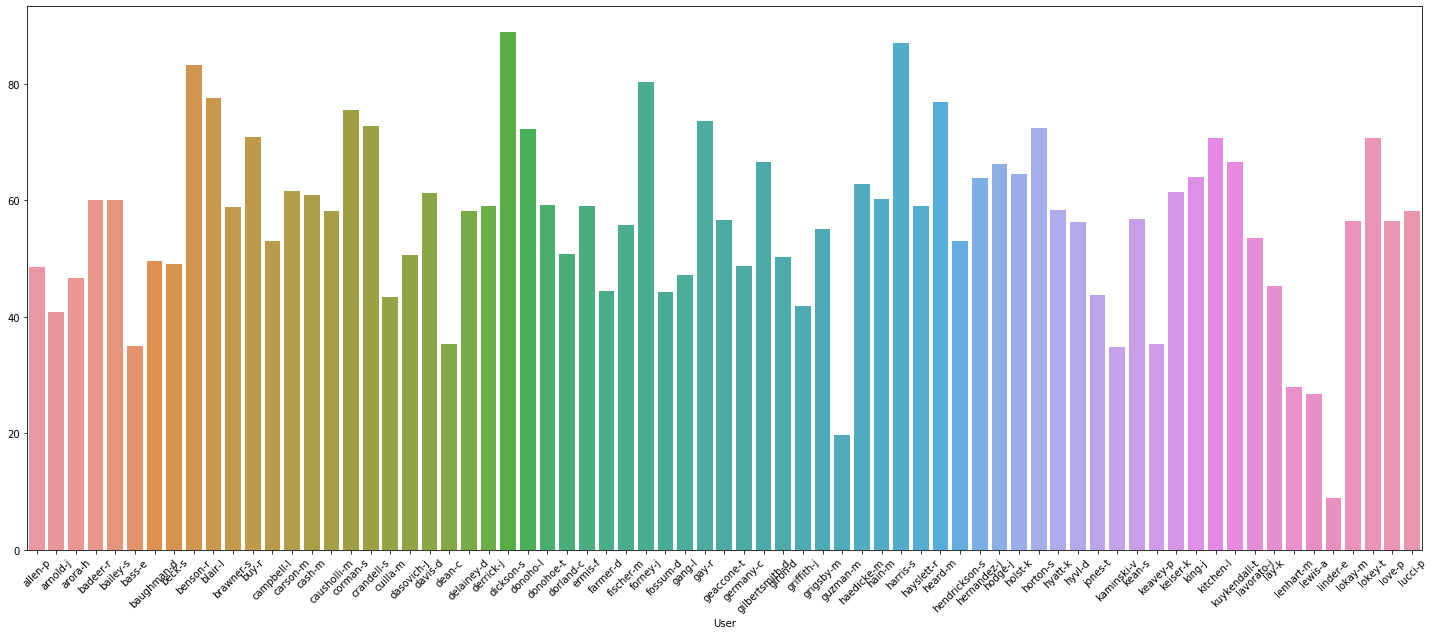

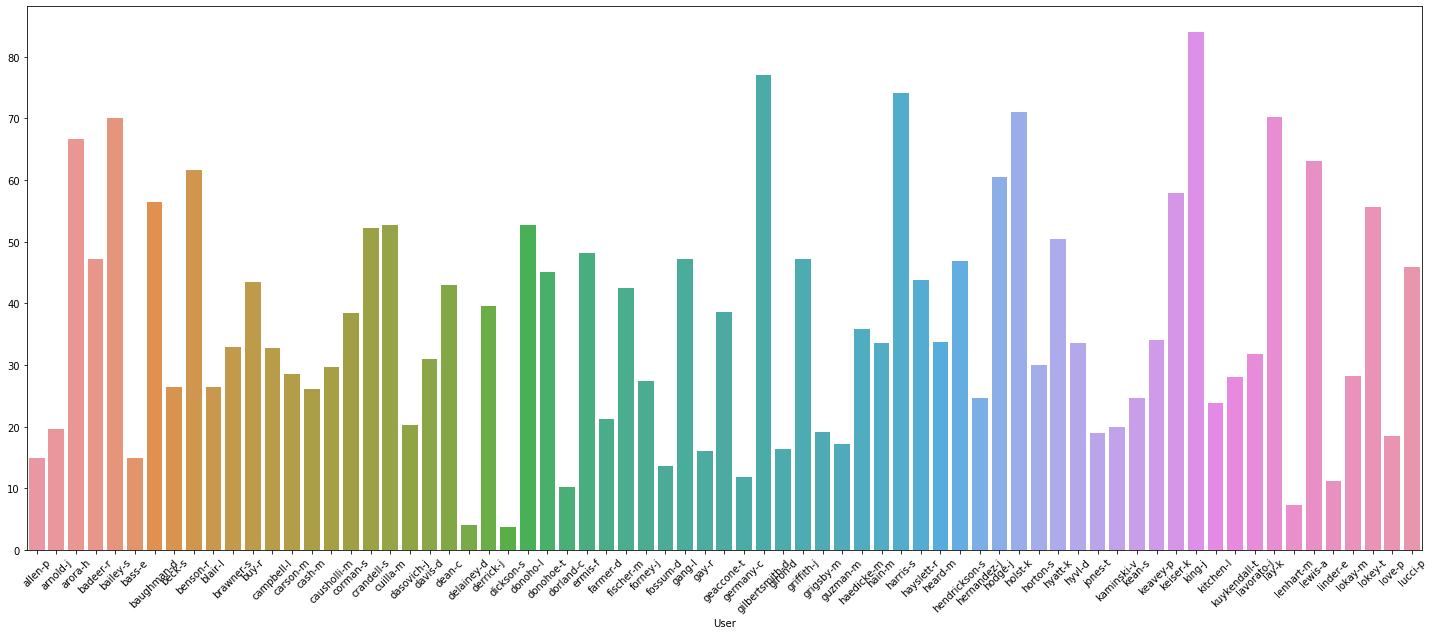

In [16]:
plt.figure(figsize=(25,10))
barUniqueSends = sns.barplot(x=toUsers.index, y=toUsers.values)
barUniqueSends = barUniqueSends.set_xticklabels(barUniqueSends.get_xticklabels(), rotation=45)
fig.savefig('barUniqueSends.png')

plt.figure(figsize=(25,10))
barUniqueRecs = sns.barplot(x=fromUsers.index, y=fromUsers.values)
barUniqueRecs = barUniqueRecs.set_xticklabels(barUniqueRecs.get_xticklabels(), rotation=45)
fig.savefig('barUniqueRecs.png')

In [17]:
linder = small_df[small_df["User"] == 'linder-e']
linder

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
262694,2001-04-30 15:58:00-07:00,outlook.team@enron.com,"alan.comnes@enron.com, bert.meyers@enron.com, ...",4-URGENT - OWA Please print this now.,1.0,"Alan Comnes, Bert Meyers, Bill Williams III, C...",,,\eric linder 6-28-02\Notes Folders\All documents,LINDER-E,eric linder 6-28-02.nsf,None,Current Notes User:\n\nREASONS FOR USING OUTLO...,all_documents,linder-e,4,30,2001
263162,2001-04-16 03:42:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/16/01; HourAhead hour: 11; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Discussion ...,eric linder 6-28-02.nsf,Start Date: 4/16/01; HourAhead hour: 11; No a...,discussion_threads,linder-e,4,16,2001
264227,2001-04-09 04:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/9/01; HourAhead hour: 12; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/9/01; HourAhead hour: 12; No an...,notes_inbox,linder-e,4,9,2001
263029,2001-04-11 21:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/12/01; HourAhead hour: 5; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Discussion ...,eric linder 6-28-02.nsf,Start Date: 4/12/01; HourAhead hour: 5; No an...,discussion_threads,linder-e,4,11,2001
264040,2001-04-14 11:42:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/14/01; HourAhead hour: 19; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/14/01; HourAhead hour: 19; No a...,notes_inbox,linder-e,4,14,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262147,2001-04-13 04:43:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/13/01; HourAhead hour: 12; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\All documents,eric linder 6-28-02.nsf,Start Date: 4/13/01; HourAhead hour: 12; No a...,all_documents,linder-e,4,13,2001
264124,2001-04-11 18:41:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/12/01; HourAhead hour: 2; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/12/01; HourAhead hour: 2; No an...,notes_inbox,linder-e,4,11,2001
263674,2001-04-26 08:45:00-07:00,pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/26/01; HourAhead hour: 16; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...","bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",,\eric linder 6-28-02\Notes Folders\Notes inbox,eric linder 6-28-02.nsf,Start Date: 4/26/01; HourAhead hour: 16; No a...,notes_inbo

*Note*: This checks out! We said that E. Linder only sends/receives 10-20% of his emails with different people. Looks like him and Pete Davis could be conspiring (/s).<br>
However, if we check the body out, we see that E. Linder sends mostly reminder emails about start dates. Explains it!

In [18]:
topUsers = small_df.groupby("User")["Text"].count().sort_values(ascending=False)
total = len(small_df)
count = 0
users = list(topUsers.keys())
top = []
score = []
for num in topUsers[:10]:
    top.append(users[count])
    score.append((num/total)*100)
    count += 1
    
count = 0
top[:5]
score[:5]
email_usage = (top,score)

['dasovich-j', 'kaminski-v', 'jones-t', 'kean-s', 'farmer-d']

[10.13, 9.575, 6.97, 5.89, 4.569999999999999]

*Note*: Was going to make a graph for this, but kind of repetitive.

In [19]:
small_df.sort_values("User").head(1)

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
1658,2000-04-13 04:04:00-07:00,phillip.allen@enron.com,suzanne.marshall@enron.com,Re: Payroll Reclasses,1.0,Suzanne Marshall,,,\Phillip_Allen_Dec2000\Notes Folders\Sent,Allen-P,pallen.nsf,None,Thanks for your help. My assistant is Ina Rangel.,sent,allen-p,4,13,2000


<Figure size 1728x576 with 0 Axes>

<Figure size 1728x576 with 0 Axes>

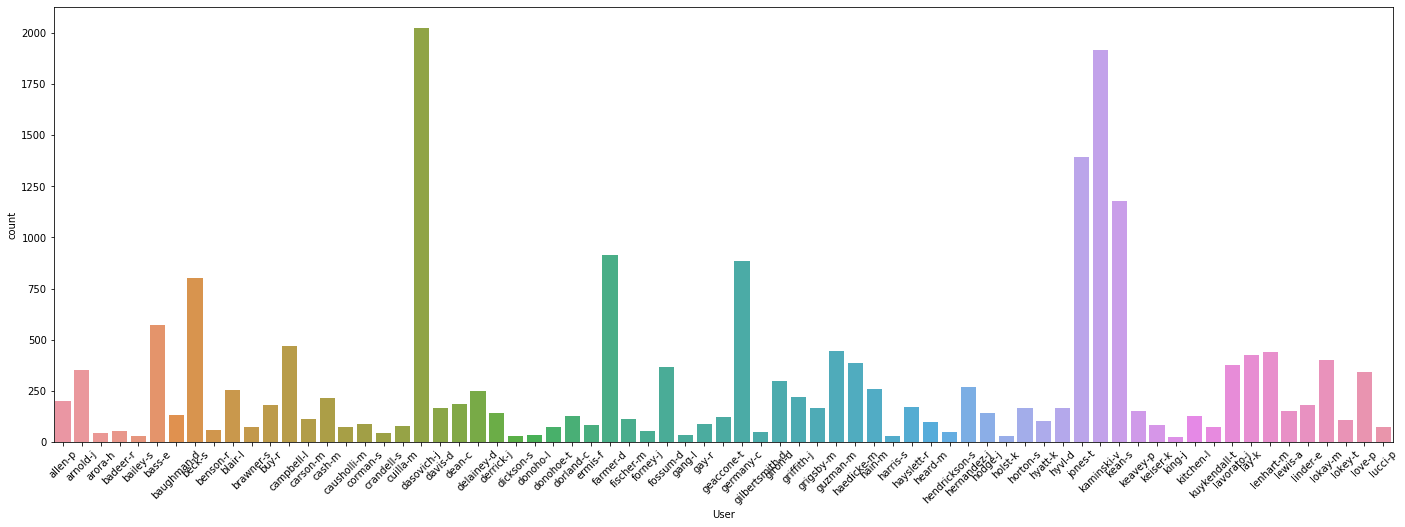

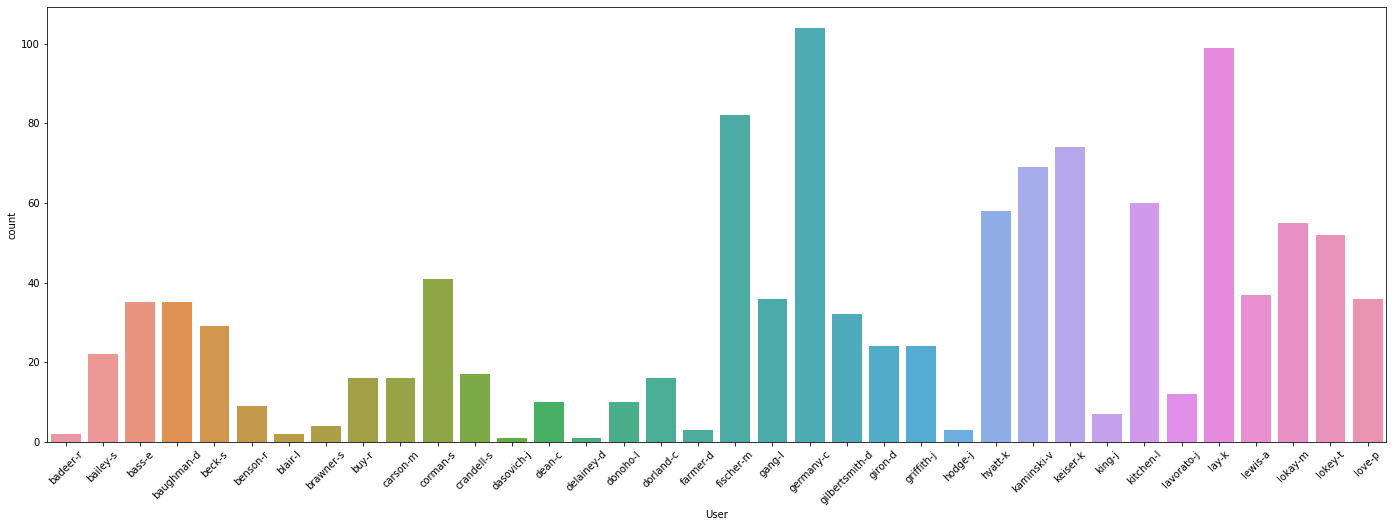

In [20]:
plt.figure(figsize=(24,8))
barUsers = sns.countplot(x='User', data=small_df.sort_values("User"))
barUsers = barUsers.set_xticklabels(barUsers.get_xticklabels(), rotation=45)
fig.savefig('barUsers.png')

plt.figure(figsize=(24,8))
barUsers2000 = sns.countplot(x='User', data=small_df[small_df["Year"] == 2002].sort_values("User"))
barUsers2000 = barUsers2000.set_xticklabels(barUsers2000.get_xticklabels(), rotation=45)
fig.savefig('barUsers2000.png')

**Summary**: So in this section we got to see two things: who is sending/receiving emails from lots of different people, and who sends the most emails!
<a id='2c'>

***Word Data at the User Level***

This is a pretty large dataset, and because of that it's hard to process text for every single user and then append it to the larger dataset. The best way to work with this corpus (without the CRC) is likely to look more on a user by user level.

In [21]:
dasovich = small_df[small_df["User"] == 'dasovich-j']
dasovich

,Date,From,To,Subject,Cc,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-FileName,Text,Folder,User,Month,Day,Year
61992,2000-12-07 02:27:00-08:00,rcarroll@bracepatt.com,"acomnes@enron.com, jdasovic@enron.com, jhartso...","DJ Calif ISO, PUC Inspect Off-line Duke South ...",1.0,"<acomnes@enron.com>, <jdasovic@enron.com>, <jh...",,,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,DASOVICH-J,jdasovic.nsf,None,"FYI\n\nDJ Calif ISO, PUC Inspect Off-line Duke...",all_documents,dasovich-j,12,7,2000
66168,2001-08-10 13:25:19-07:00,ginger.dernehl@enron.com,"joseph.alamo@enron.com, daniel.allegretti@enro...",FW: name change,1.0,"Alamo, Joseph </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",,,"\Dasovich, Jeff (Non-Privileged)\Dasovich, Jef...",DASOVICH-J,"Dasovich, Jeff (Non-Privileged).pst",None,FYI - please see the note from Susan Scott Lin...,deleted_items,dasovich-j,8,10,2001
80081,2001-09-19 09:13:29-07:00,jeff.dasovich@enron.com,"j..kean@enron.com, richard.shapiro@enron.com, ...",Call with Fielder,1.0,"Kean, Steven J. </O=ENRON/OU=NA/CN=RECIPIENTS/...",,,"\Dasovich, Jeff (Non-Privileged)\Dasovich, Jef...",DASOVICH-J,"Dasovich, Jeff (Non-Privileged).pst",None,Fielder agreed to sit down and talk as soon as...,sent_items,dasovich-j,9,19,2001
74321,2001-03-12 03:16:00-08:00,mukesh.khattar@oracle.com,lgoldseth@svmg.org,Important Blackout Busters meeting re OBMC,1.0,Laura Goldseth <lgoldseth@svmg.org>,,,\Jeff_Dasovich_June2001\Notes Folders\Notes inbox,DASOVICH-J,jdasovic.nsf,None,This is a very important working meeting of th...,notes_inbox,dasovich-j,3,12,2001
60632,2000-11-07 02:09:00-08:00,jeff.dasovich@enron.com,joseph.alamo@enron.com,Re: 2nd & LAST Request for Your Schedules,1.0,Joseph Alamo,,,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,DASOVICH-J,jdasovic.nsf,None,SF all week.\n\n\n\n\tJoseph Alamo\n\t11/06/20...,all_documents,dasovich-j,11,7,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61393,2000-11-22 04:58:00-08:00,alan.comnes@enron.com,mary.hain@enron.com,Re: Changes to Ron's draft II,"carrrn@bracepatt.com, james.steffes@enron.com,...","carrrn@bracepatt.com, james.steffes@enron.com,...",Alan Comnes,Mary Hain,"carrrn@bracepatt.com, James D Steffes, Susan J...",,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,jdasovic.nsf,My affidavit said review and reset any cap by ...,all_documents,dasovich-j,11,22,2000
55357,2001-04-30 11:19:00-07:00,cmicheli@carpentersnodgrass.com,"smccabe@mccabeandcompany.net, smara@enron.com,...",SB 1x hearing today,1.0,"""Susan McCabe"" <smccabe@mccabeandcompany.net>,...",,,\Jeff_Dasovich_June2001\Notes Folders\All docu...,DASOVICH-J,jdasovic.nsf,None,"As you may know, SB 1x (Soto/Scott) passed the...",all_documents,dasovich-j,4,30,2001
58130,1999-12-02 07:10:00-08:00,william.gang@enron.com,"mike.keeling@edex.edwards.af.mil, john.lemacks...",Electrical Commodity for Edwards AFB,jeff.dasovich@enron.com,jeff.dasovich@enron.com,William Gang,"Mike.keeling@edex.edwards.af.mil, John.lemacks...",Jeff Dasovich,,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,jdasovic.nsf,"For whatever reason, our calls, messages and e...",all_documents,dasovich-j,12,2,1999
59795,2000-10-31 09:49:00-08:00,jeff.dasovich@enron.com,"christopher.calger@enron.com, laird.dyer@enron...",Thursday Meeting w/Sempra,1.0,"Christopher F Calger, Laird Dyer",,,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,DASOVICH-J,jdasovic.nsf,None,"Chris: \n\nAs we discussed yesterday, Laird a...",all_documents,dasovich-j,10,31,2000


In [22]:
text = dasovich["Text"]
toks_count = []
for email in text:
    toks_count.append(len(nltk.word_tokenize(email)))

In [23]:
toks_count[:5]
count = 0
for tokC in toks_count:
    count+=tokC
avg_WCount = count/len(dasovich)
avg_WCount

[294, 203, 210, 517, 200]

744.448667324778

*Note*: Average email length of J. Dasovich is around 750 words! Let's plot it though.

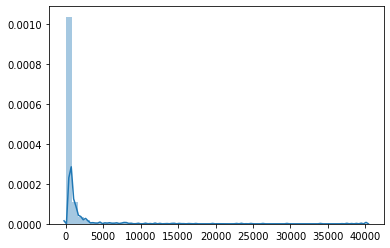

In [26]:
fig = plt.figure()
sns.distplot(toks_count)
fig.savefig('toksDistr.png')

## Unsupervised Learning

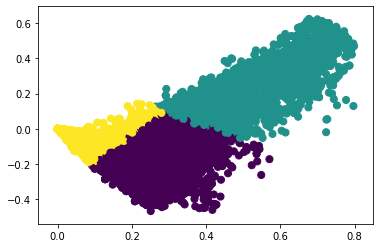

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

text = small_df['Text']
model = make_pipeline(TfidfVectorizer(max_features = 3000, stop_words = 'english'), TruncatedSVD())
labels = model.fit_transform(text)

kmeans = KMeans(n_clusters = 3, max_iter=600, algorithm = 'auto')
fit_predicted = kmeans.fit(labels)
predicted = kmeans.predict(labels)

fig = plt.figure()
plt.scatter(labels[:, 0], labels[:, 1], c=predicted, s=50, cmap='viridis')
fig.savefig('cluster.png')

*Note*: Great! We got a TFIDF vector, took care of the sparseness with SVD, then fit a kmeans around the TFIDF vector. The only question now is, what is the right number of clusters? Well luckily we have the elbow method for that.

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0),
 KMeans(algorit

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Elbow Method')

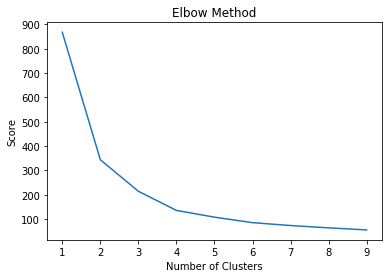

In [34]:
num_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in num_clusters]
kmeans
score = [kmeans[i].fit(labels).score(labels) for i in range(len(kmeans))]
score = [i*-1 for i in score]

fig = plt.figure()
plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()
fig.savefig('elbow.png')

*Note*: So, I think somebody broke the Enron Corpus' arm, because I can't tell whether the elbow is at 2, 3, or 4. Now we need to decide on a size and get the most informative features so we can start to size up each cluster.

In [ ]:
vect = TfidfVectorizer(stop_words='english')
text = small_df["Text"]
text = model.fit_transform(text)
tfidf = normalize(text)

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        print(features[:10])
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
top_feats = get_top_features_cluster(tfidf, predicted, 20)

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = top_feats[1][:15])